In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv


In [2]:
heart_data= pd.read_csv("/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv")

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

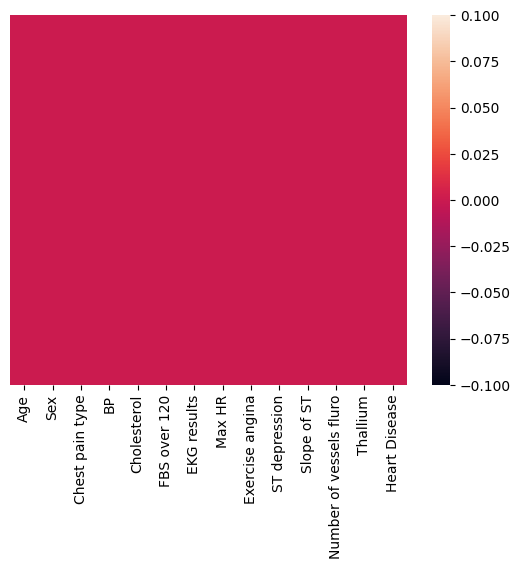

In [3]:
heart_data.head()
sns.heatmap(heart_data.isnull(), yticklabels=False)
heart_data.columns

In [4]:
heart_data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
heart_disease=pd.get_dummies(heart_data['Heart Disease'], drop_first=True)
heart_disease


,Presence
0,True
1,False
2,True
3,False
4,False
...,...
265,False
266,False
267,False
268,False


In [6]:
from sklearn.model_selection import train_test_split


In [7]:
Xtrain, Xtest, ytrain, ytest=train_test_split(heart_data[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120','EKG results', 'Max HR', 'Exercise angina', 'ST depression','Slope of ST', 'Number of vessels fluro', 'Thallium']], heart_disease, train_size=0.4, random_state=101)

In [8]:
Xtrain

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
82,58,1,4,150,270,0,2,111,1,0.8,1,0,7
177,46,1,3,150,231,0,0,147,0,3.6,2,0,3
151,50,0,3,120,219,0,0,158,0,1.6,2,0,3
101,67,1,4,120,237,0,0,71,0,1.0,2,0,3
218,54,1,3,120,258,0,2,147,0,0.4,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,40,1,4,152,223,0,0,181,0,0.0,1,0,7
75,45,1,4,142,309,0,2,147,1,0.0,2,3,7
87,59,1,1,178,270,0,2,145,0,4.2,3,0,7
63,60,0,1,150,240,0,0,171,0,0.9,1,0,3


In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logm= LogisticRegression(max_iter=700)

In [11]:
logm.fit(Xtrain, ytrain)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=700)

In [12]:
predictions= logm.predict(Xtest)

In [13]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

       False       0.80      0.97      0.88        87
        True       0.95      0.72      0.82        75

    accuracy                           0.85       162
   macro avg       0.87      0.84      0.85       162
weighted avg       0.87      0.85      0.85       162



In [15]:
from sklearn.metrics import confusion_matrix


In [16]:
print(confusion_matrix(ytest, predictions))

[[84  3]
 [21 54]]
